In [1]:
import time
from threading import Thread
import numpy as np
import cv2
import numpy as np
import torch
from fastsam import FastSAMPrompt
from matplotlib import pyplot as plt

import config

import cv2
import serial.tools.list_ports

from utils import (
    get_box_coordinates,
    get_image_with_box_corners,
    get_model,
)

# Configuration
buffer_size = 2
model_name = "fastSAM-s"
device = "cpu"
fast_sam_s_checkpoint = "FastSAM-s.pt"

In [2]:
# Initialize model
model = get_model(model_name)

In [3]:
# load image "img3.jpg" as frame
frame = cv2.imread("img1.jpg")
img = frame

In [4]:
# get image dimensions
img_height, img_width, _ = img.shape

# get centre point coordinates
center_point_coords = [int(img_width / 2), int(img_height / 2)]
input_point = np.array([center_point_coords])
input_label = np.array([1])

In [5]:
fast_sam_predictor = model(
        img, device=device, retina_masks=True, imgsz=img_width, conf=0.4, iou=0.9
    )
fast_sam_prompt_process = FastSAMPrompt(img, fast_sam_predictor, device=device)

# point prompt
# points default [[0,0]] [[x1,y1],[x2,y2]]
# point_label default [0] [1,0] 0:background, 1:foreground
img_mask = fast_sam_prompt_process.point_prompt(
    points=input_point, pointlabel=input_label
)


0: 960x736 9 objects, 1071.5ms
Speed: 22.0ms preprocess, 1071.5ms inference, 294.4ms postprocess per image at shape (1, 3, 960, 960)


In [6]:
img_mask

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])

### Modified function

In [7]:
img_mask = img_mask.astype(np.uint8)
img_mask.shape

(1, 1280, 960)

In [8]:
img_mask.squeeze().shape

(1280, 960)

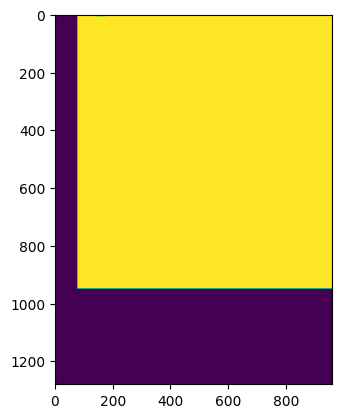

In [9]:
plt.imshow(img_mask.squeeze())

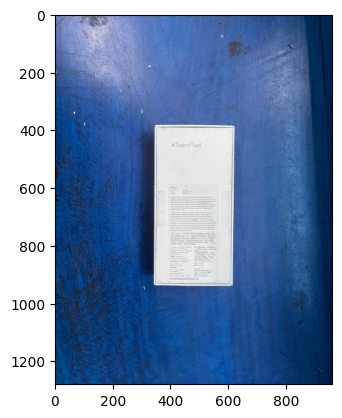

In [10]:
# show image using matplotlib
from matplotlib import pyplot as plt

plt.imshow(frame)

In [11]:
# Find the indices where the mask is True
true_indices = np.argwhere(mask)
print("True indices shape: ", true_indices.shape)

# Get the bounding box of the True region
top_left = tuple(np.min(true_indices, axis=0))
bottom_right = tuple(np.max(true_indices, axis=0))
print("Top left", top_left)
print("Bottom right", bottom_right)

top_right = tuple(np.max(true_indices, axis=1))
bottom_left = tuple(np.min(true_indices, axis=1))
print("Top right", top_right)
print("Bottom left", bottom_left)

# # Remove the channels layer coordinate
top_left = top_left[:-1]
bottom_right = bottom_right[:-1]

# Calculate the width and height of the bounding box
width = bottom_right[1] - top_left[1]
height = bottom_right[0] - top_left[0]

# make a numpy array for top_right and bottom_left
top_right = (top_left[0], top_left[1] + width)
bottom_left = (top_left[0] + height, top_left[1])


NameError: name 'mask' is not defined

In [ ]:
box_corners_dict, armctrl_dict = get_box_coordinates(
                    frame, model, device, False, False, False
                )


0: 960x736 13 objects, 1176.5ms
Speed: 116.4ms preprocess, 1176.5ms inference, 204.3ms postprocess per image at shape (1, 3, 960, 960)


True indices shape:  (812350, 3)
Top left (0, 103, 0)
Bottom right (947, 959, 0)
Top right (103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292

In [ ]:
box_corners_dict

{'top_left': (0, 103),
 'top_right': (0, 959),
 'bottom_right': (947, 959),
 'bottom_left': (947, 103)}